# Homework 2

DUE Oct 27th at 11:59 PM

## Problem 1

In this problem, we will vary the capacity of our estimator a.k.a machine learning model and see the effect on performance. We are interested in understanding the bias-variance tradeoff and how model capacity influences training and test error.

Run the following code to load the Boston housing dataset. We will be regressing the median price of a house in Boston using 13 features of its residential locality. This dataset was collected by the U.S. Census Service in the 1970s.

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
import random

X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3, random_state=123,
                                                    shuffle=True)

a) Fill in the code template below to uniformly draw samples with replacement from the training data. The size of the sampled dataset should be equal to the training dataset size. 

In [2]:
from random import choices

def draw_sample(X,y):
    indices = np.arange(len(X))
    indices = choices(indices, k=len(X))
    sample_X = X[indices]
    sample_y = y[indices]
    
    return(sample_X, sample_y)
    

b) We will be using Decision Trees for this problem. Note that the capacity of a decision tree is its maximum depth/number of nodes. In this part, for each depth parameter, you have to run multiple trials. In each trial, you sample a dataset from the training set using the code in part a. Use the sampled dataset to train a decision tree model and obtain predictions on the test data (cross-val is not required). Average predictions over the trials to get the mean estimator for each depth. 

In [3]:
# This loop includes calculations also used for parts c) and d)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

depths = np.arange(2,12,1)
avgValue = []
avgBias = []
avgVar = []
testScores = []
trainScores = []

for depth in depths:
    valueList = []
    add_pred = [0] * len(y_test)
    mse_tests = []
    mse_trains = []
    
    # 5 trials for each depth
    for i in range(100): 
        # Draw the sample, fit a tree, and make predictions from the test set
        X_sample, y_sample = draw_sample(X_train, y_train)
        tree = DecisionTreeRegressor(random_state=123, max_depth = depth)
        fit = tree.fit(X_sample, y_sample)
        y_pred = tree.predict(X_test)
        add_pred = np.add(add_pred, y_pred)
        
        # Take averages of instance and append to list for specific depth
        instanceAvg = np.mean(y_pred)
        valueList.append(instanceAvg)
        
        # Test error
        mse_tests.append(mean_squared_error(y_pred, y_test))
        
        # Train error
        y_train_pred = tree.predict(X_train)
        mse_trains.append(mean_squared_error(y_train_pred, y_train))
    
    
    # Get average value by depth  
    avgValue.append(np.mean(valueList))
    
    # Bias/Variance by depth
    add_pred = add_pred/100
    avgBias.append(np.mean((y_test - add_pred) ** 2))
    avgVar.append(np.var(add_pred))
    
    # Train/Test by depth
    trainScores.append(np.mean(mse_trains))
    testScores.append(np.mean(mse_tests))


c) Compute the average bias<sup>2,</sup> and average variance and plot them as a function of depth on the same plot. What does the general trend indicate?

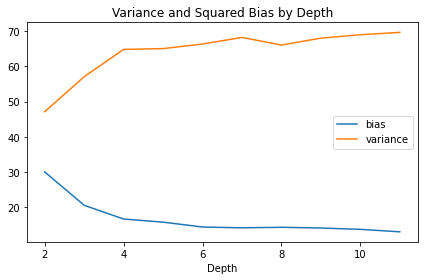

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(depths, avgBias, label = 'bias')
ax.plot(depths, avgVar, label = 'variance')
ax.legend()

plt.xlabel('Depth')
plt.title('Variance and Squared Bias by Depth')

fig.tight_layout()

plt.show()

__Solution__: The trend in this graph shows us that the variance increases and bias^2 decreases as we increase the depth of the tree.

d) Compute the average training and average test error and plot them as a function of the depth.  What do the general trends from both the plots indicate?

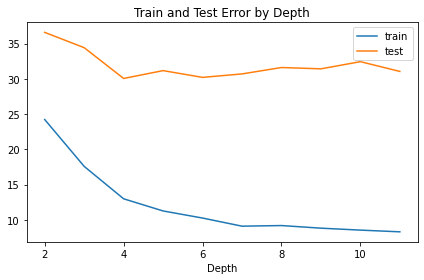

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(depths, trainScores, label = 'train')
ax.plot(depths, testScores, label = 'test')
ax.legend()

plt.xlabel('Depth')
plt.title('Train and Test Error by Depth')

fig.tight_layout()

plt.show()

__Solution__: The trend we see here is that the test MSE is consistently a much higher value than the train MSE.

## Problem 2

In this problem, we will apply and compare 2 methods for dimensionality reduction: **PCA** and **LDA**. Dimensionality reduction is an essential step in preparing your data before passing them into a learning model. If done correctly, the small resulting set of dimensions can capture most of the important patterns in the data while reducing noises and training time. However, too much compression can lead to loss of useful information.

Run the following code to load the Boston dataset as a binary classification problem.

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

median = np.median(y)
for i in range(len(y)):
    if y[i] > median:
        y[i] = 1
    else:
        y[i] = 0

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    shuffle=True)

a) Use PCA to reduce the training data to one dimensions. Fit a SVM classifier on the reduced data.

In [7]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    shuffle=True)

# First scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=3)
scaler = StandardScaler()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
clf = SVC()
fit = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Now evaluate the trained model on the testing data. Remember to transform the testing data using the same PCA model fitted on your training data. Report the result as a confusion matrix.

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, y_test)

array([[39,  9],
       [ 7, 47]])

b) Use LDA to reduce the training data to two dimensions. Fit a SVM classifier on the reduced data.

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

# Original split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    shuffle=True)

lda = LinearDiscriminantAnalysis()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [11]:
clf = SVC()
fit = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Similar to part **b**, evaluate the trained model on the testing data. Report the result as a confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, y_test)

array([[47,  8],
       [ 4, 43]])

c) Now without any dimensionality reduction, train a SVM model on the original data. Report the result as a confusion matrix.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    shuffle=True)
clf = SVC()
fit = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

confusion_matrix(y_pred, y_test)

array([[34,  8],
       [20, 40]])

d) Compare the confusion matrices from the three strategies. 

__Solution__: For this problem it was clear that using either PCA or LDA dimension reductionality was beneficial in our total classification. There were significantly less total misclassifications, but the frequency and type of misclassifications depended on the individual trials and models that were fit. Either way, we can conclude that dimension reducing helped our classification in this example.

## Problem 3

In this problem, you will investigate how the size of the training data on the performance of a generative model (NB) and a discriminative model (LR). **You are free to use scikit-learn's NB and LR.** 




Run the following code to load and prepare the Boston dataset.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

median = np.median(y)
for i in range(len(y)):
    if y[i] > median:
        y[i] = 1
    else:
        y[i] = 0

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    shuffle=True)

a) We will train NB classifiers that use only a portion of the training data. Let's vary this portion from 1% to 100% of the training set (100 iterations). For each portion value, sample the training set according to the portion, train a NB classifer on this portion of the training set, and evaluate the model accuracy on the testing set. Notice that because the quality of the model depends on the specific subset of the training data that we draw, you will have to repeat the experiment many times for any portion value and report the average (If you repeat for a large number of times, say 100, expect your code to run for a few minutes). 

In [15]:
def draw_sample_percent(X,y,percent):
    indices = np.random.choice(np.arange(0,len(X)), size = int(len(X) * percent/100))
    sample_X = X[indices]
    sample_y = y[indices]
    
    return(sample_X, sample_y)
    

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Write a loop where the iterative is each % point up to 100
allScoresNB = []

for i in np.arange(1, 101):  # Range of percentage points
    scores = []
    
    for j in range(100): # Number of iterations per % point
        X_sample, y_sample = draw_sample_percent(X_train, y_train, i)
        nb = MultinomialNB()
        fit = nb.fit(X_sample, y_sample)
        y_pred = nb.predict(X_test)
        scores.append(accuracy_score(y_pred, y_test))
    
    allScoresNB.append(np.mean(scores))
    

Plot the accuracies of the models versus the portion of the training set used. Comment on the effect of increasing the size of the training dataset on the performance of NB.

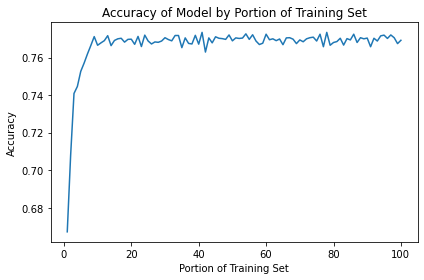

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(np.arange(1,101), allScoresNB)

plt.xlabel('Portion of Training Set')
plt.ylabel('Accuracy')
plt.title('Accuracy of Model by Portion of Training Set')

fig.tight_layout()

plt.show()

__Solution__: When we increase the portion initally, we see a drastic increase in the accuracy of the model, but this begins to converge to a limit when we get to sampling around 10% or more of the training set.

b) Repeat part **b** with LR.

In [18]:
# Ignore convergence warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

# Write a loop where the iterative is each % point up to 100
allScoresLR = []

for i in np.arange(1, 101):  # Range of percentage points
    scores = []
    
    for j in range(100): # Number of iterations per % point
        X_sample, y_sample = draw_sample_percent(X_train, y_train, i)
        
        while len(np.unique(y_sample)) < 2:  # Prevents the sample from having one class
            X_sample, y_sample = draw_sample_percent(X_train, y_train, i)
        
        lr = LogisticRegression(solver = 'liblinear')
        fit = lr.fit(X_sample, y_sample)
        y_pred = lr.predict(X_test)
        scores.append(accuracy_score(y_pred, y_test))
    
    allScoresLR.append(np.mean(scores))
    

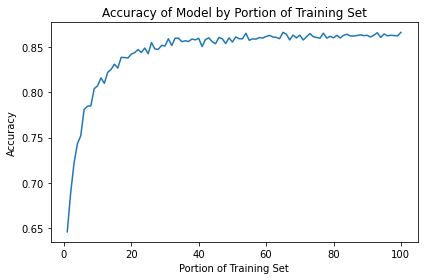

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(np.arange(1,101), allScoresLR)

plt.xlabel('Portion of Training Set')
plt.ylabel('Accuracy')
plt.title('Accuracy of Model by Portion of Training Set')

fig.tight_layout()

plt.show()

__Solution__: The plot shows us that like the NB model, we increase the accuracy of the model until it converges at a certain portion of the sampling amount, which appears to be much higher in this case, probably around 50% or so before it fully tails off.

c) Plot both the results of NB and LR on the same figure.

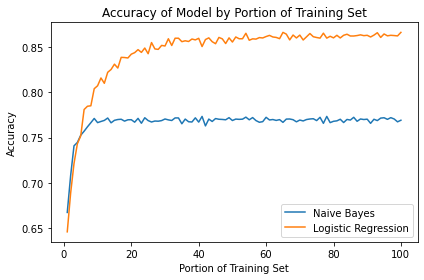

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(np.arange(1,101), allScoresNB, label = 'Naive Bayes')
ax.plot(np.arange(1,101), allScoresLR, label = 'Logistic Regression')
ax.legend()

plt.xlabel('Portion of Training Set')
plt.ylabel('Accuracy')
plt.title('Accuracy of Model by Portion of Training Set')

fig.tight_layout()

plt.show()

Between a generative model (NB) and a discriminative model (LR), which is more affected by small training dataset? Which one converges faster? Which one performs better in the long run given enough training data?

__Solution__: In terms of accuracy, the generative model is more affected as its convergent accuracy is less than the discriminative model, but the discriminative model takes a longer time to converge to its limit. As far as the better performer over a long period of time, it looks like the discriminative model will perform better.

## Problem 4

In this problem, you will work on the clustering problem using Bottom-up Agglomerative clustering and K-mean clustering.

a) A 4-D dataset is given in **'iris.csv'** with the last column being the ground truth label. Load the file. Store the data in a variable ***X*** and store the label in a variable ***y***. Because clustering is an unsupervised task, there is no need for the labels during training.

In [21]:
import pandas as pd
iris = pd.read_csv('iris.csv', header=None)

iris = iris.to_numpy()
X = iris[:, :4]
y = iris[:, 4]

b) Train a clustering model using Bottom-up Agglomerative clustering.

In [22]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = len(np.unique(y)))
fit = ac.fit(X)

Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color. 

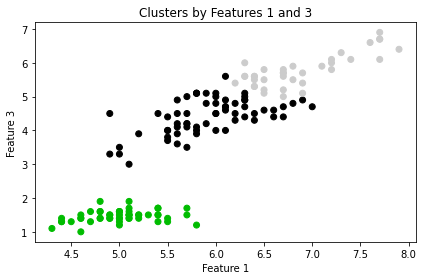

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

plt.scatter(X[:, 0], X[:, 2], c=ac.labels_, cmap=plt.cm.nipy_spectral)

plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.title('Clusters by Features 1 and 3')

fig.tight_layout()

plt.show()

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

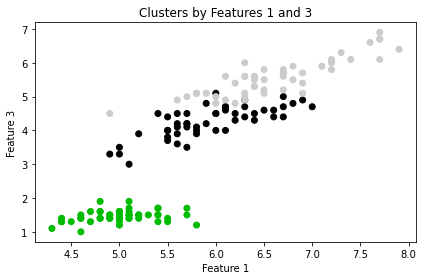

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

classDict = {'Versicolor': 0,
             'Setosa': 1,
             'Virginica': 2}
map_y = [classDict[k] for k in y]

plt.scatter(X[:, 0], X[:, 2], c=map_y, cmap=plt.cm.nipy_spectral)

plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.title('Clusters by Features 1 and 3')

fig.tight_layout()

plt.show()

__Solution__: Our model performed quite well. The only thing that seemed to trip it up was when the values of feature 1 and 3 were on the low end of their classifications, it had some trouble distinguishing between the two classes, but other than that it correctly estimated the majority of the data. 

c) Train a clustering model using K-mean clustering.

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = len(np.unique(y)))
fit = kmeans.fit(X)

Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color.

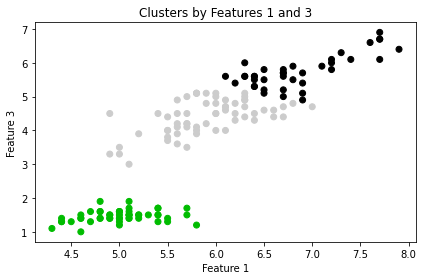

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

plt.scatter(X[:, 0], X[:, 2], c=kmeans.labels_, cmap=plt.cm.nipy_spectral)

plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.title('Clusters by Features 1 and 3')

fig.tight_layout()

plt.show()

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

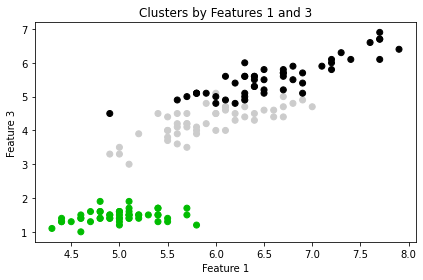

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

classDict = {'Versicolor': 2,
             'Setosa': 1,
             'Virginica': 0}
map_y = [classDict[k] for k in y]

plt.scatter(X[:, 0], X[:, 2], c=map_y, cmap=plt.cm.nipy_spectral)

plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.title('Clusters by Features 1 and 3')

fig.tight_layout()

plt.show()

__Solution__: When running the k-means clustering model, our model ended up performing the same as our agglomerative clusterer, as the misclassified points were the same in this one as they were in that one. Overall however, this model still does a very good job of classifying when just looking at features 1 and 3.

## Problem 5

This problem builds on ideas from the paper: “Against prediction: Sentencing, Policing, And Punishing In An Actuarial Age,” Chicago Public Law And Legal Theory Working Paper No. 94, Harcourt, 2005. 

Suppose we have two groups $A$ and $B$ of student population sizes $n$ and $9n$. We find that under equal financial support, group $A$’s dropout rate is $0.2$ dropouts per year per student and that of group $B$ is $0.1$ dropout per person per year. Equal support means that out of a total of $10m$ scholarships, $m$ scholarships are granted to group $A$ and $9m$ scholarships are granted to group $B$. The support is $\frac{m}{n}$ per capita for both groups. So, under equal support, the combined dropout rate over both groups is $0.11n$ per year. 

Suppose we want to bring down the overall dropout rate by increasing the support for group $A$. In order to do that we collected some data and found that we could model the rate of decrease in dropouts for group $A$ by a function as follows:
	If we increase the per capita support from $\frac{m}{n}$ to $\frac{m}{n} (1 + \delta_A)$, the dropout rate declines to $0.2e^{- \alpha \delta_A}$. ($\alpha>0$)

Similarly, we modeled the rate of increase in dropouts for group $B$ by a function under reduced support as follows:
	If we decrease the per capita support from $\frac{m}{n}$ to $\frac{m}{n} (1 - \delta_B)$, the dropout rate rises to $0.1e^{ \beta \delta_B}$. ($\beta>0$)

How would you distribute the scholarships so that 

**a)** Both groups had the same dropout rate?

**b)** The combined dropout rate was minimized?


Consider 3 different scenarios when $\alpha > \beta$, $\alpha = \beta$, and $\alpha < \beta$. 

**c)** For each of the scenarios, which of the above solutions would you prefer and why?

**TIPS**:
- For **part a** and **part b**, answer by calculating $\delta_A$ and $\delta_B$.
- Try to set up equations from the given information. This problem mostly consists of algebra.
- If you do it correctly, **part c** should makes sense immediately.

__Part a)__

First, we want to find how to relate $\delta_A$ to $\delta_B$:

$$0.1\left (\frac{m(1+\delta_A)}{n} \right) + 0.9\left (\frac{m(1-\delta_B)}{n} \right) = \frac{m}{n}$$

From this we can get:

$$\delta_A = 9\delta_B$$

Now we can substitute into the dropout rates to find our delta values in terms of alpha and beta.

$$e^{-9\alpha\delta_B} = e^{\beta\delta_B + \text{ln}(\frac{1}{2})}$$

Solving further we get:

$$\delta_B = \frac {\text{ln(2)}} {9\alpha + \beta}$$

Now that we know $\delta_B$:

$$\delta_A = \frac {9\text{ln(2)}} {9\alpha + \beta}$$

Finally, apply these values to our original rates:

I would want Group A to have $\frac{m}{n} \left (1 + \frac {9\text{ln(2)}} {9\alpha + \beta} \right)$ scholarships per capita, and I would want Group B to have $\frac{m}{n} \left (1 - \frac {\text{ln(2)}} {9\alpha + \beta} \right)$ scholarships per capita.

__Part b)__

For this part, we want to substitute one of our delta values and the use it in the dropout rates. From there, we want to take the derivative of the sum of our rates and then set that equal to 0 to find what minimizes our total dropout.

$$0.2e^{- \alpha \delta_A} + 0.1e^{\beta \delta_B} = 0.2e^{- 9\alpha \delta_B} + 0.1e^{\beta \delta_B}$$

$$\frac{d}{\delta_B} = -1.8\alpha e^{- 9\alpha \delta_B} + 0.1\beta e^{\beta \delta_B} = 0$$

From this, we can find:

$$-9\alpha \beta \delta_B + \text{ln}(18 \alpha) = \beta \delta_B + \text{ln}(\beta)$$

$$\delta_B = \frac {\text{ln}(\frac{18\alpha}{\beta})} {9\alpha + \beta}$$

And again, apply these to our original values, (where $\delta_A$ is simply 9 times $\delta_B$):

I would want Group A to have $\frac{m}{n} \left (1 + \frac {9\text{ln}(\frac{18\alpha}{\beta})} {9\alpha + \beta} \right)$ scholarships per capita, and I would want Group B to have $\frac{m}{n} \left (1 - \frac {\text{ln}(\frac{18\alpha}{\beta})} {9\alpha + \beta} \right)$ scholarships per capita.

__Part c)__

For this section, I used Desmos online graphing calculator to visualize the dropout rates with differing values of $\alpha$ and $\beta$ as well as how many kids were to drop out in each scenario. In terms of both fairness to groups and total dropouts of kids, I found that the better solution was to equalize the dropout rates. The only scenario in which there were ever less kids dropping out for the other solution was when $\alpha$ was substantially larger than $\beta$.

For when $\alpha = \beta$, I would personally choose taking the option where we equalize the dropout rates because we significantly decrease Group A's dropout rate and only marginally increase group B's rate, whereas with the other option we lower Group A's to nearly none while raising Group B's substantially.

Again when $\alpha > \beta$, I would take the option where we equalize dropout rates as we witness a similar phenomenon to when $\alpha = \beta$.

For when $\alpha < \beta$, I would again take the option where we equalize droupout rates, especially because at a certain threshold, the natural log term of the minimizer flips to the wrong side and ends up increasing the total dropout rate.

So for all 3 scenarios, I would rather pick the solution where we equalize the dropout rates.